In [6]:
pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from hmmlearn import hmm
import librosa as lb
import librosa.display
import soundfile as sf
from IPython.display import Audio
from scipy.io.wavfile import write
from scipy.signal import stft,cosine,gaussian,convolve
import scipy.signal as sp

In [8]:
def stft_feature(signal, n_fft=2048, hop_length=512):
    stft = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))
    return stft

y, sr = librosa.load("Lab_7_Saumik.wav", sr=None)

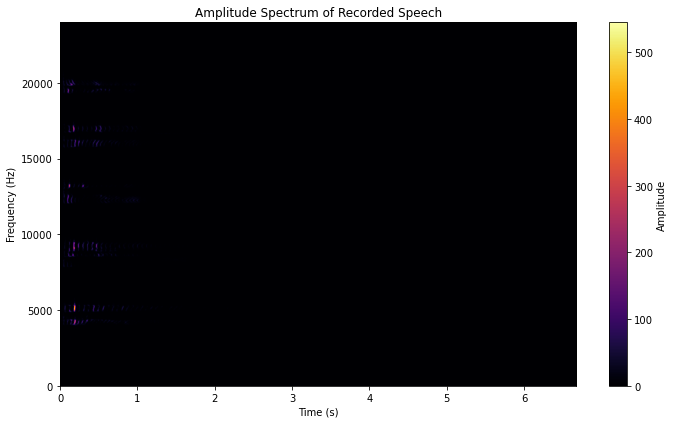

In [9]:
stft_features = stft_feature(y)

plt.figure(figsize=(10,6))
plt.title('Amplitude Spectrum of Recorded Speech')
plt.imshow(stft_features.T, aspect='auto', origin='lower', cmap='inferno', extent=[0, len(y)/sr, 0, sr/2])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()

In [26]:
n_components = 3
n_iter = 100

model = hmm.GaussianHMM(n_components=n_components, n_iter=n_iter)
model.fit(stft_features.T)

predicted_labels = model.predict(stft_features.T)
predicted_class = np.argmax(np.bincount(predicted_labels))

print("Predicted class:", predicted_class)

Predicted class: 2


In [27]:
predicted_labels = model.predict(stft_features.T)

print("State Sequence is:")
print()
print(predicted_labels)

State Sequence is:

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


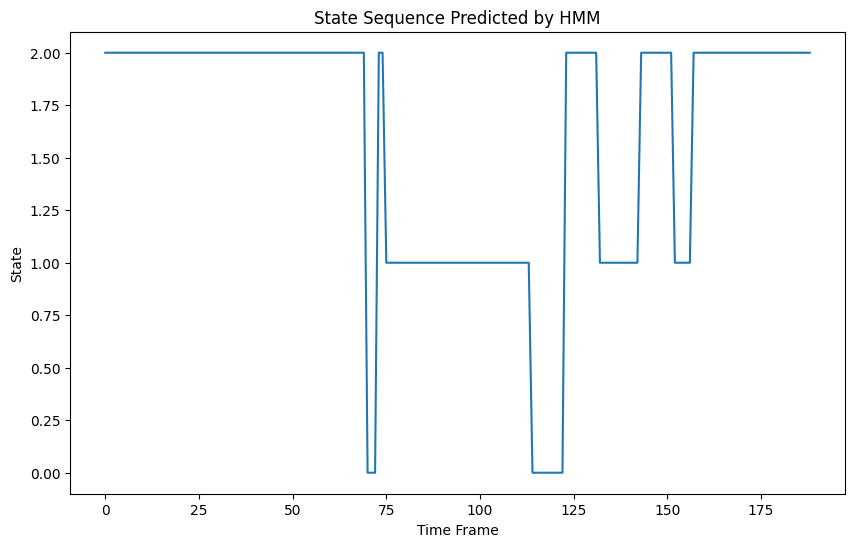

In [28]:
plt.figure(figsize=(10,6))
plt.title('State Sequence Predicted by HMM')
plt.plot(predicted_labels)
plt.xlabel('Time Frame')
plt.ylabel('State')
plt.show()

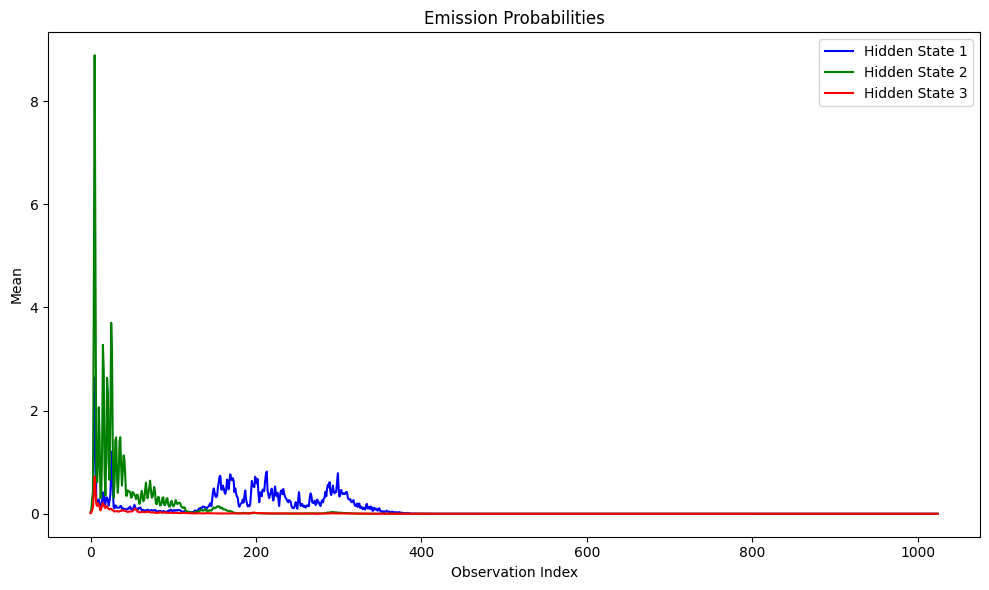

In [29]:
colors = ['blue', 'green', 'red']

plt.figure(figsize=(10, 6))
plt.title('Emission Probabilities')
for i in range(model.n_components):
    plt.plot(model.means_[i], label=f'Hidden State {i+1}', color=colors[i])

plt.xlabel('Observation Index')
plt.ylabel('Mean')
plt.legend()
plt.tight_layout()
plt.show()